In [296]:
import pandas as pd
import numpy as np

In [297]:
df = pd.read_csv('spam.csv' , encoding='latin1')

In [298]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


1. data cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Deploy

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [300]:
df.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True)

In [301]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [302]:
df.rename(columns = {'v1' : 'target' , 'v2' : 'text'} , inplace = True)

ham -> 0 , spam -> 1

In [303]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [304]:
df['target'] = encoder.fit_transform (df['target'])

In [305]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [306]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [307]:
df.duplicated().sum()

np.int64(403)

In [308]:
df = df.drop_duplicates(keep = 'first')

In [309]:
df.duplicated().sum()

np.int64(0)

## EDA 

In [310]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [311]:
import matplotlib.pyplot as plt

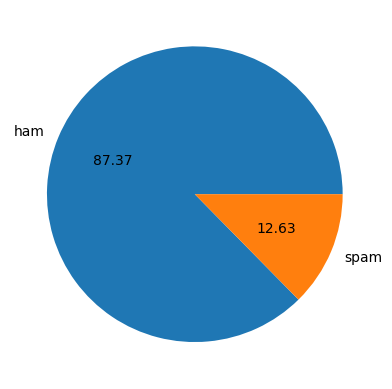

In [312]:
plt.pie(df['target'].value_counts() , labels = ['ham' , 'spam'] , autopct='%0.2f')
plt.show()

In [313]:
import nltk

In [314]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rhishavchanda/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [315]:
## to calculate the no. of characters of the text

df['num_characters'] = df['text'].apply(len)

In [316]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [317]:
## to calculate the number of words

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [318]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [319]:
## to calculate the no. of sentences in the text

df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [320]:
df.rename(columns = {'num_sent' : 'num_sentences'} , inplace = True)

In [321]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [322]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [323]:
##ham
df[df['target'] == 0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [324]:
## spam
df[df['target'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [325]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

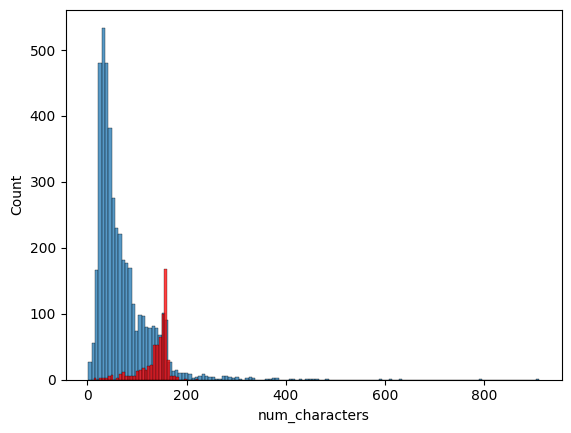

In [326]:
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'] , color = 'red')

we can see that spam messages contains more no. of characters than ham

<Axes: xlabel='num_words', ylabel='Count'>

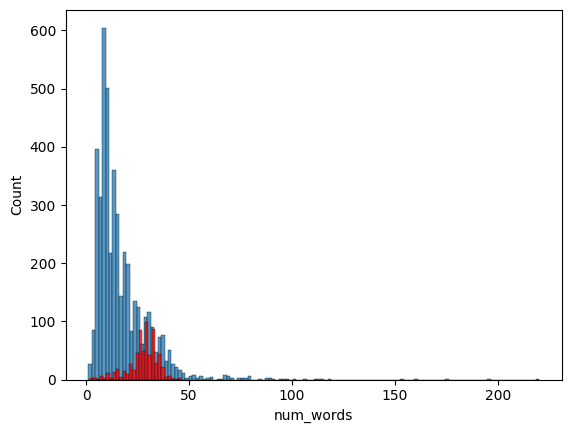

In [327]:
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'] , color = 'red')

we can see that spam messages contains more no. of words than ham (although there are outliers)

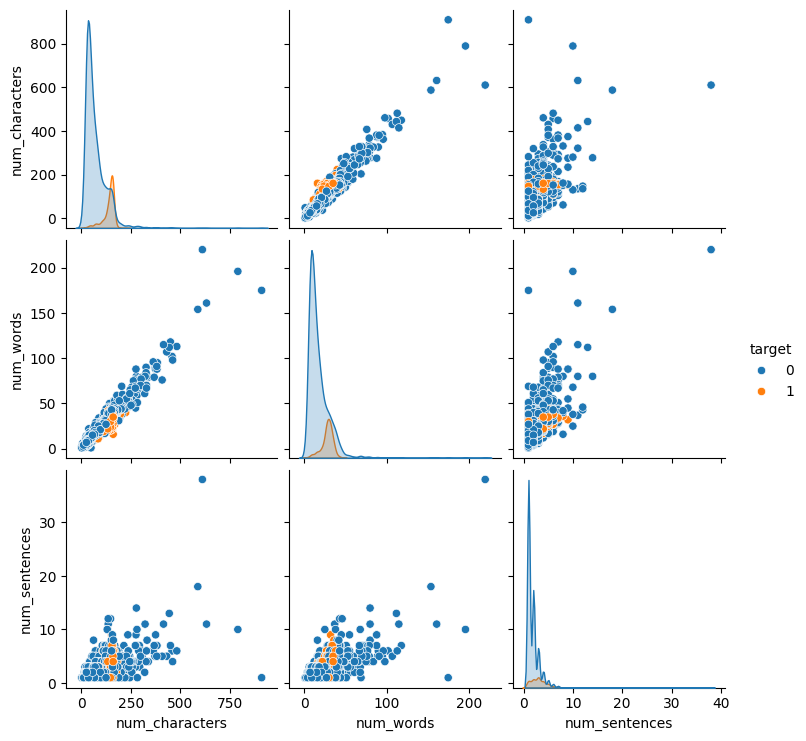

In [328]:
sns.pairplot(df ,hue = 'target')

In [329]:
df2 = df[['target' , 'num_characters' , 'num_words' , 'num_sentences']]


<Axes: >

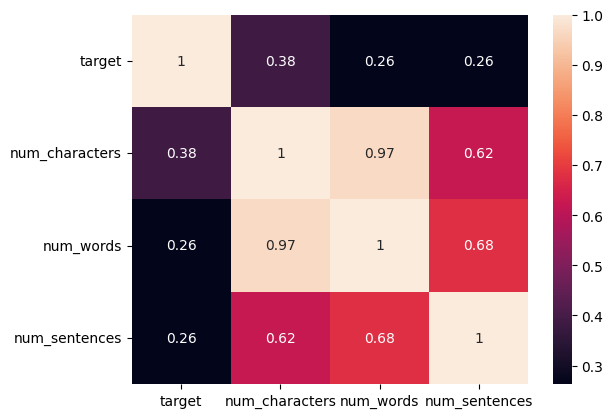

In [330]:
sns.heatmap(df2.corr() , annot = True)

# Data Preprocessing
## 1. lower case
## 2. tokenization
## 3. removing special characters
## 4. removing stop words and punctuations
## 5. stemming

In [331]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rhishavchanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [332]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [333]:
import string

In [334]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [335]:
def transform_text(text):
    text = text.lower() ## convert to lower case
    text = nltk.word_tokenize(text) ## tokenization
    y=[]
    for i in text:
        if i.isalnum():  ## remove special characters
            y.append(i)
    text = y[:] ## you cant copy a list(text =y) , you have to clone it
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    
    return " ".join(y)

In [336]:
transform_text('What! is + ,  your overall %  Rhishav?')

'overal rhishav'

In [337]:
df['transformed_text'] = df['text'].apply(transform_text)

In [338]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [346]:
from wordcloud import WordCloud
wc = WordCloud(width =1000 , height = 1000 , min_font_size = 10 , background_color = 'white')

In [347]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

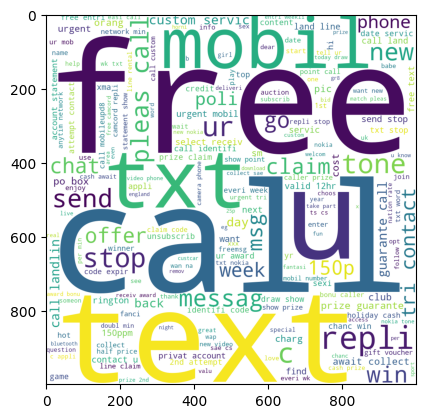

In [348]:
plt.imshow(spam_wc)

In [349]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

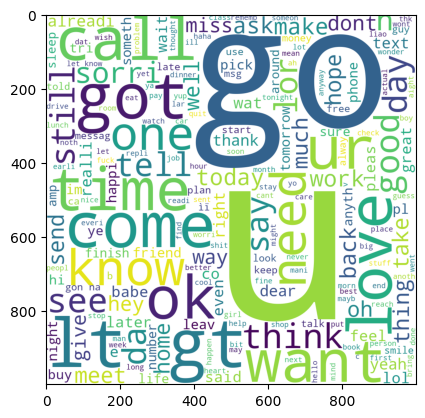

In [350]:
plt.imshow(ham_wc)

In [353]:
df[df['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [354]:
x = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        x.append(word)

In [356]:
len(x)

9939

there are 9939 spam words 

In [358]:
from collections import Counter
Counter(x) ## this gives the count of the spam words

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [359]:
Counter(x).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [362]:
df3 =pd.DataFrame(Counter(x).most_common(10))

In [363]:
df3.head(3)

,0,1
0,call,320
1,free,191
2,2,155


<Axes: xlabel='0', ylabel='1'>

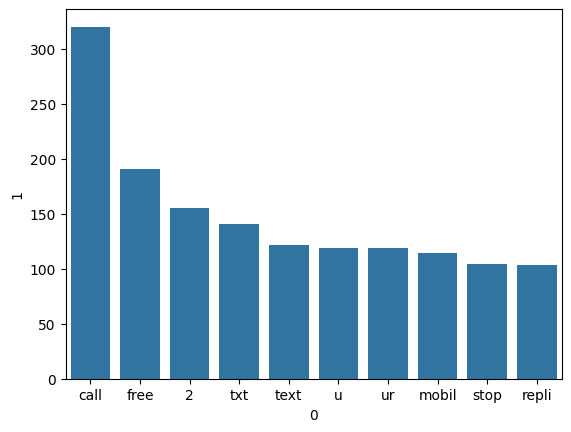

In [365]:
sns.barplot(x= df3[0], y= df3[1])

In [366]:
y = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        y.append(word)

In [368]:
len(y)

35404

In [369]:
len(x)

9939

x-> spam words
y-> ham words

In [370]:
df4 =pd.DataFrame(Counter(y).most_common(10))


In [374]:
 df4.head(3)

,0,1
0,u,883
1,go,404
2,get,349


<Axes: xlabel='0', ylabel='1'>

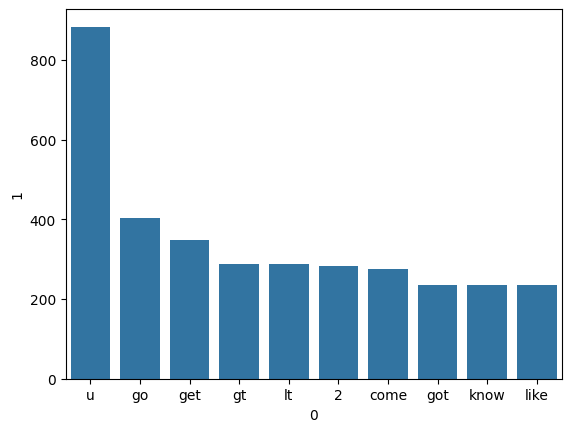

In [375]:
sns.barplot(x= df4[0], y= df4[1])

## model building

In [433]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)

In [434]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [435]:
x.shape

(5169, 3000)

In [436]:
y= df['target'].values

In [437]:
y.shape

(5169,)

In [438]:
from sklearn.model_selection import train_test_split

In [439]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 42)

In [440]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

In [441]:
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score

In [442]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [443]:
gnb.fit(x_train ,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test , y_pred1))

0.8646034816247582
[[769 120]
 [ 20 125]]
0.5102040816326531


In [444]:
mnb.fit(x_train ,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[871  18]
 [ 12 133]]
0.8807947019867549


In [445]:
bnb.fit(x_train ,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test , y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


lets try this with tfidfvectorizer instead of countvectorizer

In [406]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [446]:
tfidf = TfidfVectorizer(max_features = 3000)


In [447]:
a = tfidf.fit_transform(df['transformed_text']).toarray()

In [448]:
a.shape

(5169, 3000)

In [451]:
x2_train , x2_test , y2_train , y2_test = train_test_split(a , y , test_size =0.2, random_state= 42) 

In [452]:
gnb2 = GaussianNB()
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()

In [453]:
gnb2.fit(x2_train ,y2_train)
y2_pred1 = gnb.predict(x2_test)
print(accuracy_score(y2_test,y2_pred1))
print(confusion_matrix(y2_test, y2_pred1))
print(precision_score(y2_test , y2_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [454]:
mnb2.fit(x2_train ,y2_train)
y2_pred2 = mnb.predict(x2_test)
print(accuracy_score(y2_test,y2_pred2))
print(confusion_matrix(y2_test, y2_pred2))
print(precision_score(y2_test , y2_pred2))

0.9777562862669246
[[884   5]
 [ 18 127]]
0.9621212121212122


In [455]:
bnb2.fit(x2_train ,y2_train)
y2_pred3 = bnb.predict(x2_test)
print(accuracy_score(y2_test,y2_pred3))
print(confusion_matrix(y2_test, y2_pred3))
print(precision_score(y2_test , y2_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


from gnb ,gnb2 , mnb ,mnb2 , bnb , bnb2 , we see mnb2 has the highest precision

In [456]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb ,open('model.pkl' , 'wb'))
